# Solar Irradiance Forecasting using ARIMA model
This notebook works on predicting Global Irradiance using a dataset supported by Shell,
NVIDIA, and Microsoft. The aim is to forecast solar power output, addressing the
challenge of its intermittency caused by changing weather conditions. The ability to
accurately predict Global Irradiance is crucial for maintaining a balance between energy
generation and consumption on the grid.

The dataset comprises time series data from January 1,
2020, with observations recorded at minute intervals, with the target variable being global
irradiance. In this project, we employ an ARIMA model to predict future values of global
irradiance, focusing solely on the time component without utilizing the other features from
the dataset.

Dataset source:
https://www.kaggle.com/datasets/dilipkola/shell-ai-solar-irradiance-prediction-hackathon?select=train.csv

In [ ]:
library(readxl)
library(ggplot2)
library(tseries)
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



# **Model Specification**

In [ ]:
Solar_Irradiance <- read.csv("/Solar_Irradiance.csv")
View(Solar_Irradiance)

MST,Global.Irradiance
<chr>,<dbl>
00:00,-0.962276
00:01,-0.937921
00:02,-0.944395
00:03,-0.951350
00:04,-0.934976
00:05,-0.913492
00:06,-0.922662
00:07,-0.906123
00:08,-0.898426


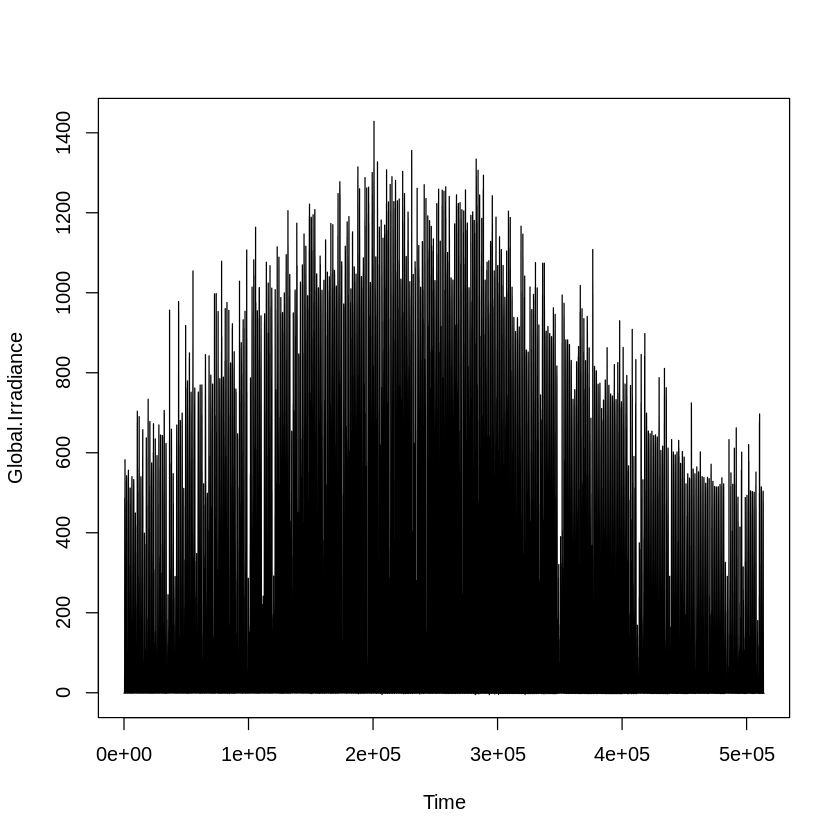

In [ ]:
attach(Solar_Irradiance)
plot.ts(Global.Irradiance)

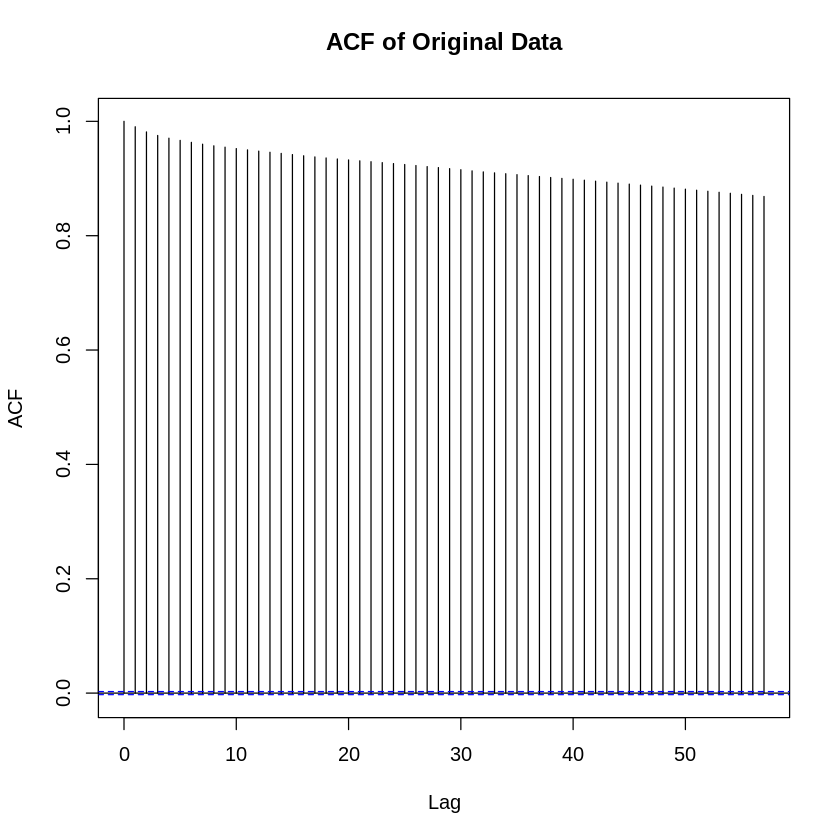

In [ ]:
acf_original <- acf(Solar_Irradiance$`Global.Irradiance`, main = "ACF of Original Data")

The above data plot shows that the data exhibit
an increasing then decreasing trend over
time. Moreover, by plotting the ACF shows
that the significant lines are outside of the
confidence interval.
In this case we can say that our data is not
stationary and we need to take the
difference.

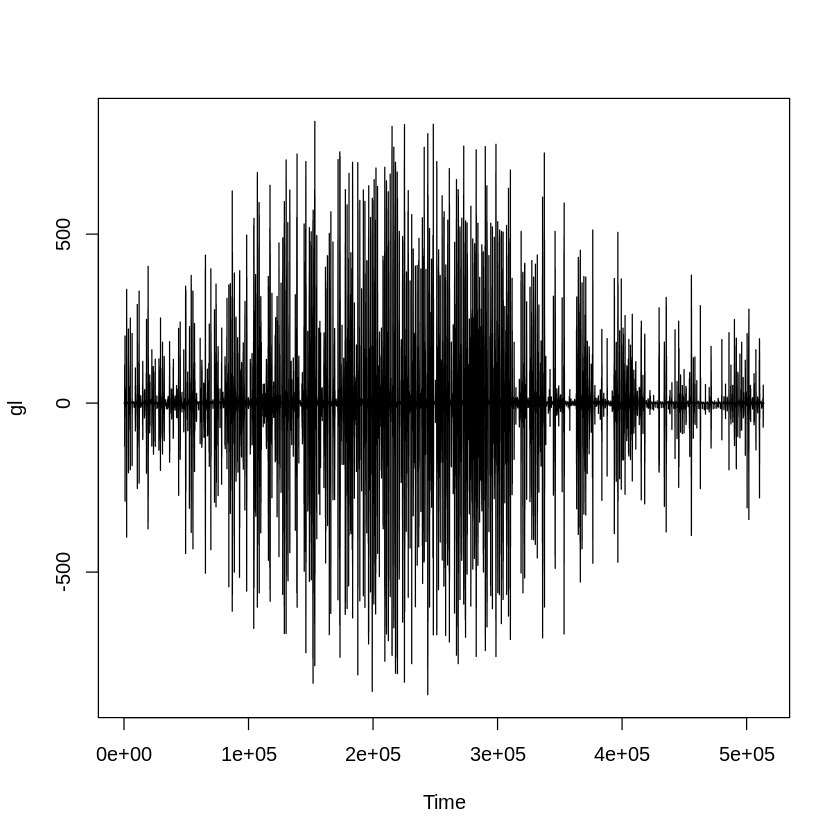

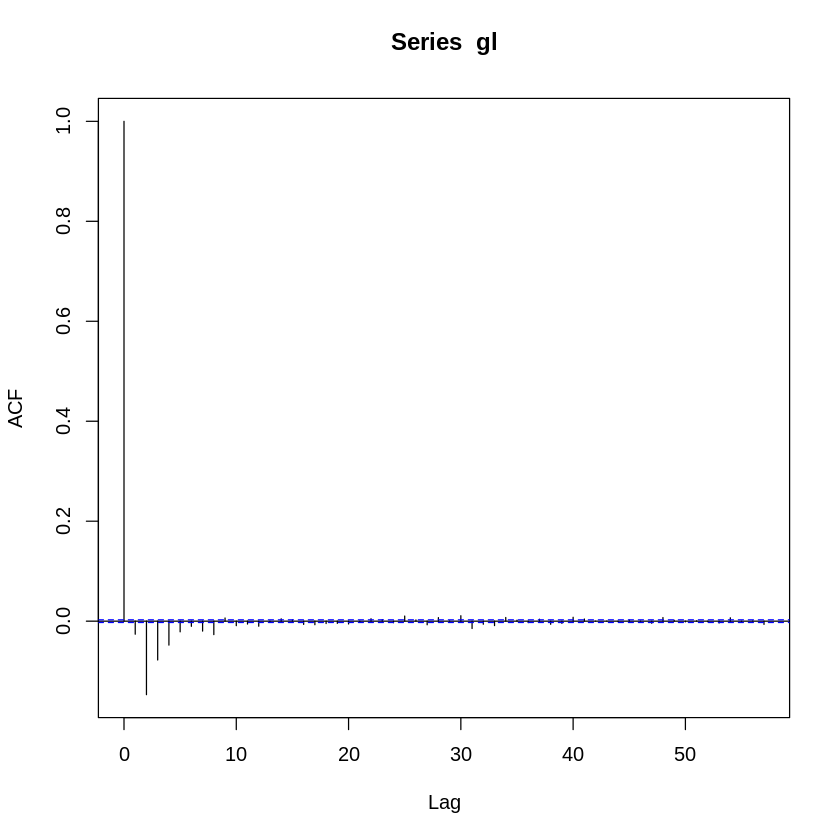

In [ ]:
gl=diff(Global.Irradiance)
plot.ts(gl)
acf(gl)

By taking the first deference the data plot shows that the mean is constant  hence the first deference is stationary. In this data set the d=1.

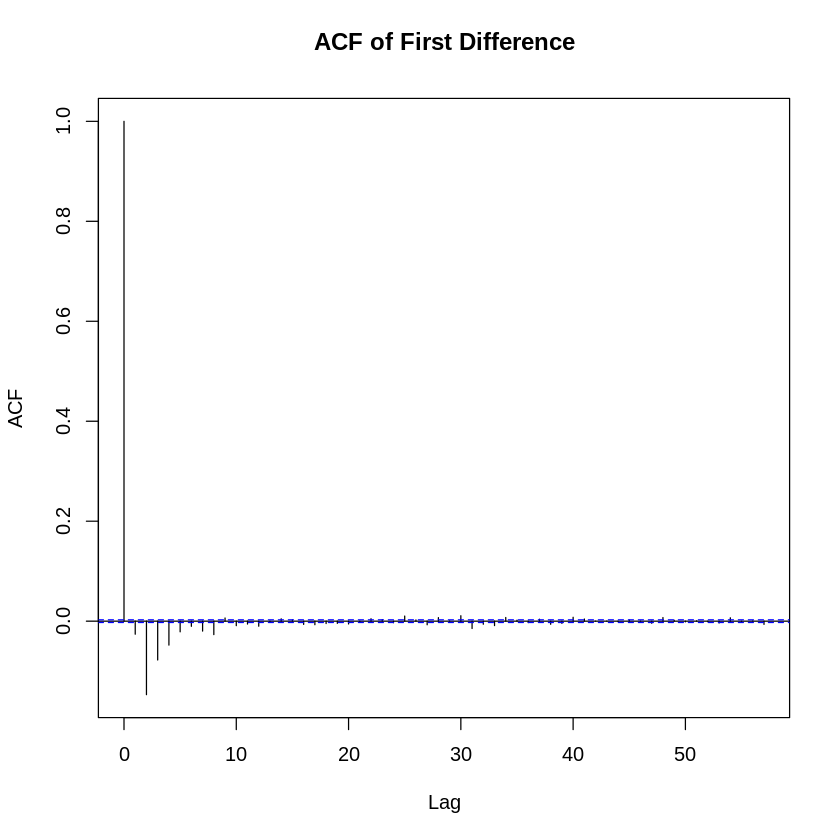

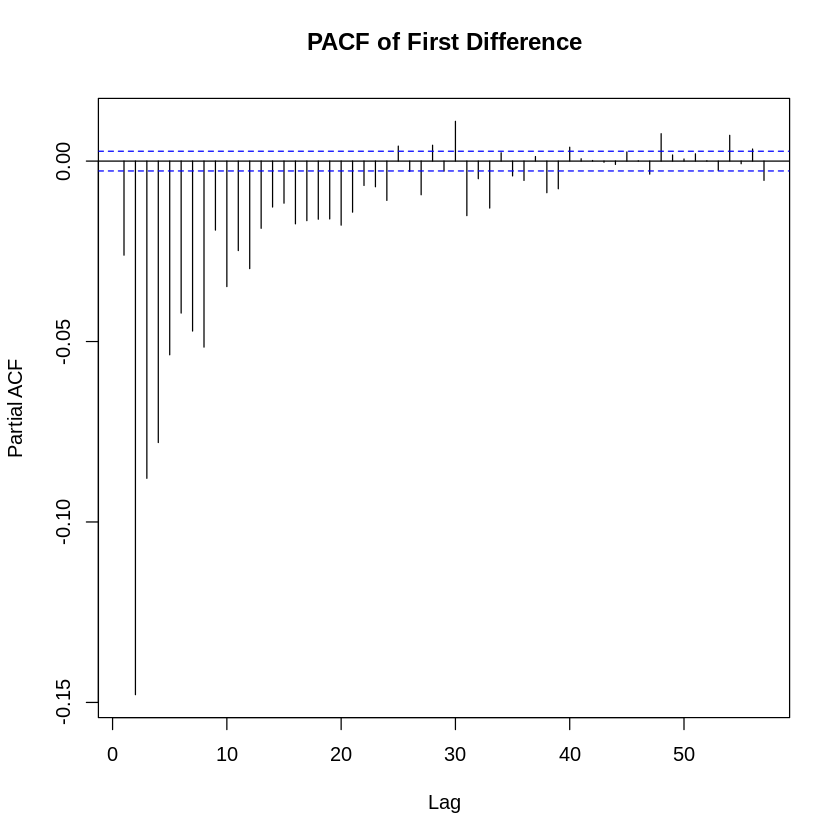

In [ ]:
acf_diff <- acf(gl, main = "ACF of First Difference")
pacf_diff <- pacf(gl, main = "PACF of First Difference")

The above graph of the ACF where we have a spike at lag 0 which seems to be obvious since a
variable has a correlation=1 with itself but starting from lag one we notice that there are no spikes,
then the order of the MA models seems to be 0.

From the above PACF graph there is a spike at lag 1 with an exponential decay afterward. This
decay implies that after the first lag, the correlations decrease exponentially and become
negligible. So the order of the AR model is 1.

So our model will be: ARIMA(1,1,0)

In [ ]:
model <- arima(Global.Irradiance[1:513960], order = c(1, 1, 0))
accuracy(model)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-8.029492e-07,40.35586,9.289728,-1.254375,7.976664,1.005418,-0.0038535


# **Fitting and Diagnostics:**

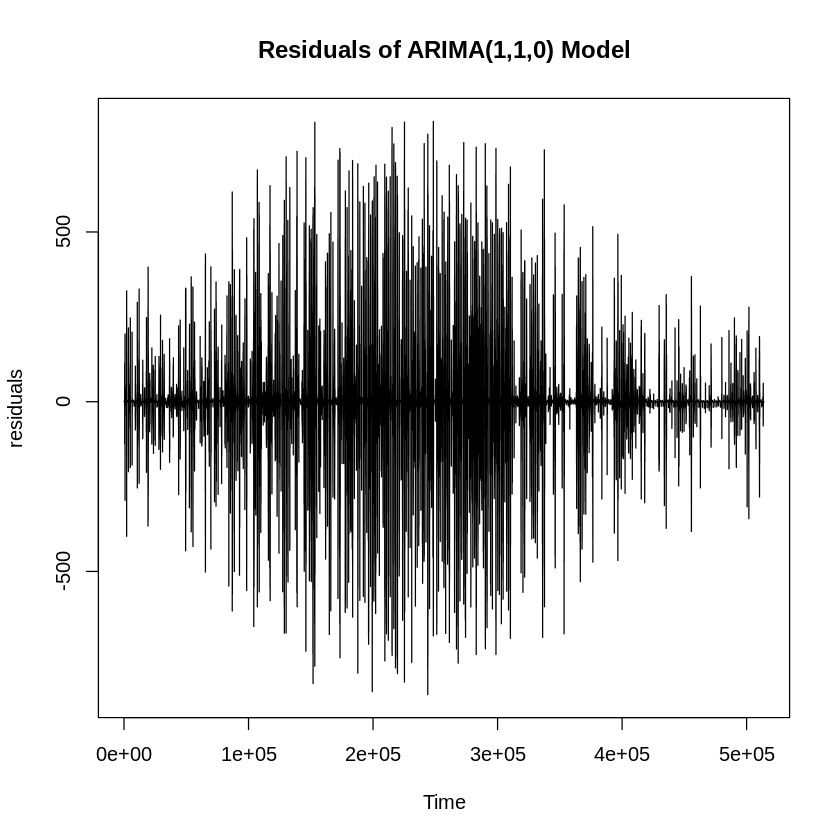

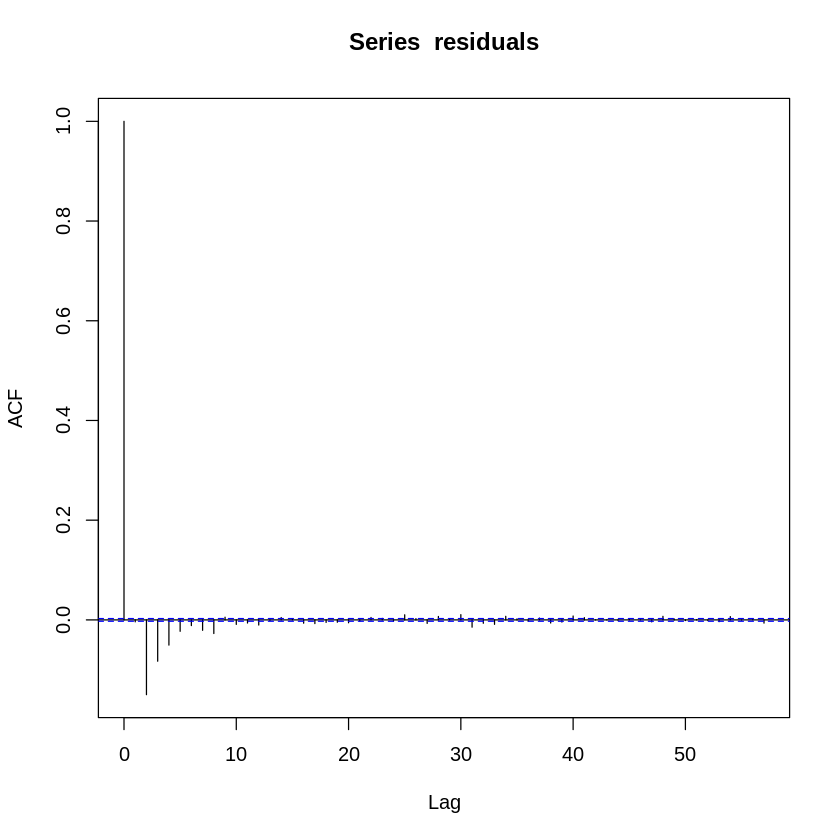

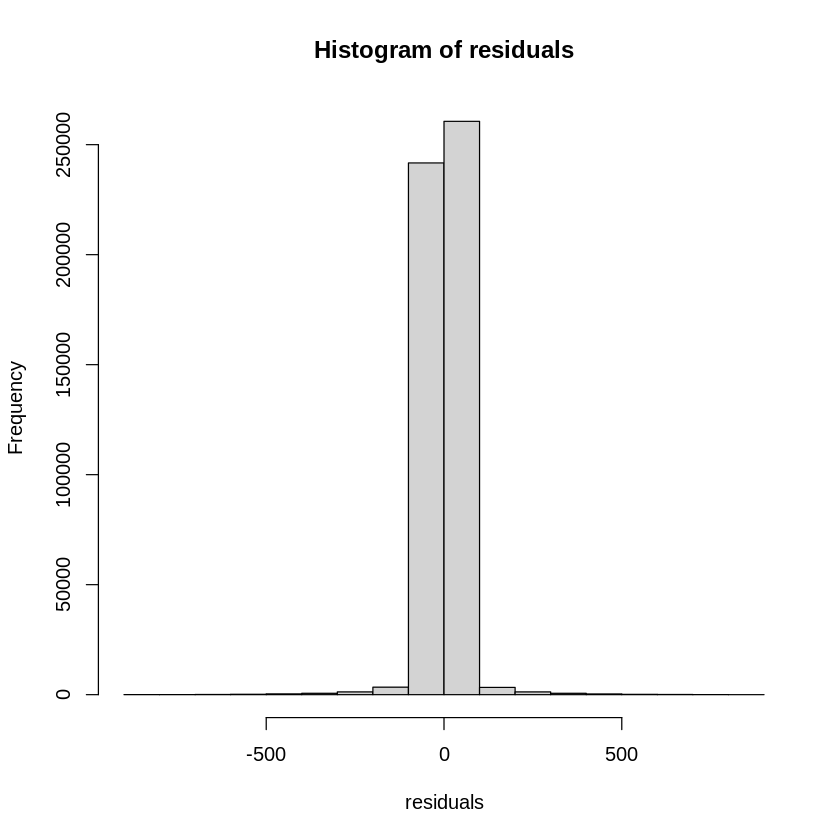

In [ ]:
residuals <- residuals(model)
plot(residuals, main = "Residuals of ARIMA(1,1,0) Model")
acf(residuals)
hist(residuals)

From the Acf we see that we have a spike just at
lag 0 where the others are in the confidence
intervals , then the residuals have a very small
correlation hence they are independent. Moreover,
the graph shows that they are stationary and have a
constant mean. From the histogram we can see that
the distribution of the residuals is normal. So since
we have independent normally distributed
residuals with constant mean then they look like
white noise.

# **Forecasting:**
Knowing that we have 513969 data instance we took 513960 to train the model in the cells above and the other 9 instances
for testing

In [ ]:
forecasted_gi <- forecast(model, h = 9)


In [ ]:
forecasted_gi

       Point Forecast      Lo 80     Hi 80      Lo 95     Hi 95
513961      -1.363510  -53.08168  50.35466  -80.45963  77.73261
513962      -1.363531  -73.55719  70.83013 -111.77421 109.04715
513963      -1.363531  -89.41250  86.68544 -136.02281 133.29574
513964      -1.363531 -102.81906 100.09200 -156.52637 153.79931
513965      -1.363531 -114.65003 111.92297 -174.62028 171.89322
513966      -1.363531 -125.35723 122.63017 -190.99552 188.26846
513967      -1.363531 -135.21062 132.48356 -206.06499 203.33792
513968      -1.363531 -144.38678 141.65971 -220.09871 217.37165
513969      -1.363531 -153.00869 150.28163 -233.28479 230.55773

In [ ]:
tail(Global.Irradiance,9)

[1] -1.35646 -1.34914 -1.34254 -1.34046 -1.36091 -1.34252 -1.34126 -1.33413
[9] -1.34943

**After printing the forecasted values
and the original date values, we can say
that the forecasted values are pretty
close to the true values and that our
model is accurate**